In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [264]:
df = pd.read_csv('airbnb_listings.csv', encoding_errors='ignore')
df.head()

,host_id,host_name,city,state,zipcode,country,latitude,longitude,property_type,room_type,...,beds,bed_type,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
0,5867023,Michael,New York,NY,10022-4175,United States,40.756852,-73.964754,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$160.00,322,62,86.0,7.0,10.0,9.0
1,2631556,Denise,New York,NY,NaN,United States,40.830599,-73.941014,Apartment,Entire home/apt,...,3.0,Real Bed,NaN,$105.00,348,22,85.0,8.0,7.0,8.0
2,4601412,Miao,Brooklyn,NY,11221,United States,40.692189,-73.924120,Apartment,Private room,...,2.0,Real Bed,NaN,$58.00,227,35,98.0,10.0,9.0,10.0
3,198425,Sara,New York,NY,10011,United States,40.734751,-74.002592,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$185.00,274,26,96.0,9.0,10.0,9.0
4,22590025,Charles,New York,NY,10011,United States,40.745282,-73.997836,Apartment,Entire home/apt,...,2.0,Real Bed,NaN,$195.00,365,1,100.0,10.0,10.0,10.0


<hr>

<h1>1. DEFINE PROBLEM STATEMENT AND PERFORM EXPLORATORY DATA ANALYSIS AND COMMENTS:- </h1>

<h3>(a) OBSERVATIONS ON SHAPE OF THE DATA AND DATA TYPES OF ALL THE ATTRIBUTES :-</h3>

In [265]:
print("Shape of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)

Shape of the dataset: (27392, 23)

Data Types:
 host_id                        int64
host_name                     object
city                          object
state                         object
zipcode                       object
country                       object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
square_feet                  float64
price                         object
availability_365               int64
number_of_reviews              int64
review_scores_rating         float64
review_scores_cleanliness    float64
review_scores_location       float64
review_scores_value          float64
dtype: object


<h3>(b) CHECKING FOR MISSING VALUES :-</h3>

In [266]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values[missing_values > 0])
print("\nPercentage of Missing Values:\n", missing_percentage[missing_percentage > 0])


Missing Values:
 state                            2
zipcode                        162
country                          1
property_type                    6
bathrooms                      463
bedrooms                       140
beds                            98
square_feet                  26386
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
dtype: int64

Percentage of Missing Values:
 state                         0.007301
zipcode                       0.591414
country                       0.003651
property_type                 0.021904
bathrooms                     1.690275
bedrooms                      0.511098
beds                          0.357769
square_feet                  96.327395
review_scores_rating         31.604118
review_scores_cleanliness    31.874270
review_scores_location       31.877921
review_scores_value          31.885222
dtype: float64


In [267]:
# Dropping square_feet column because it cant be treated

df.drop('square_feet', axis=1, inplace=True)

# Dropping columns below because all are same

df.drop(['state', 'country', 'city'], axis=1, inplace=True)

# Dropping host_name and host_id column because it is irrelevant

df.drop(['host_name', 'host_id'], axis=1, inplace=True)

<h3>(c) DISPLAY THE STATISTICAL SUMMARY:- </h3>

In [268]:
summary = df.describe()
summary

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
count,27392.000000,27392.000000,27392.000000,26929.000000,27252.000000,27294.000000,27392.000000,27392.000000,18735.000000,18661.000000,18660.000000,18658.000000
mean,40.733070,-73.964276,2.892779,1.116287,1.135660,1.531289,262.919210,10.130221,92.218895,9.011093,9.248660,9.125737
std,0.048968,0.035162,1.755137,0.369832,0.667599,1.098971,125.668249,18.665400,8.336264,1.163870,0.973474,0.906612
min,40.509611,-74.239539,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000
25%,40.699655,-73.988449,2.000000,1.000000,1.000000,1.000000,177.000000,0.000000,89.000000,8.000000,9.000000,9.000000
50%,40.728024,-73.966075,2.000000,1.000000,1.000000,1.000000,333.000000,3.000000,94.000000,9.000000,10.000000,9.000000
75%,40.764030,-73.947260,4.000000,1.000000,1.000000,2.000000,363.000000,11.000000,99.000000,10.000000,10.000000,10.000000
max,40.907704,-73.726710,16.000000,8.000000,10.000000,16.000000,365.000000,221.000000,100.000000,10.000000,10.000000,10.000000


<h3>(d) UNIVARIATE AND BIVARIATE ANALYSIS OF ALL ATTRIBUTES:-</h3>

In [269]:
# TAKING OUT NUMERICAL COLUMNS:-

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

In [270]:
# TAKING OUT CATEGORICAL COLUMNS:-

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['zipcode', 'property_type', 'room_type', 'bed_type', 'price'], dtype='object')

<h4>UNIVARIATE ANALYSIS OF NUMERICAL COLUMNS:- </h4>

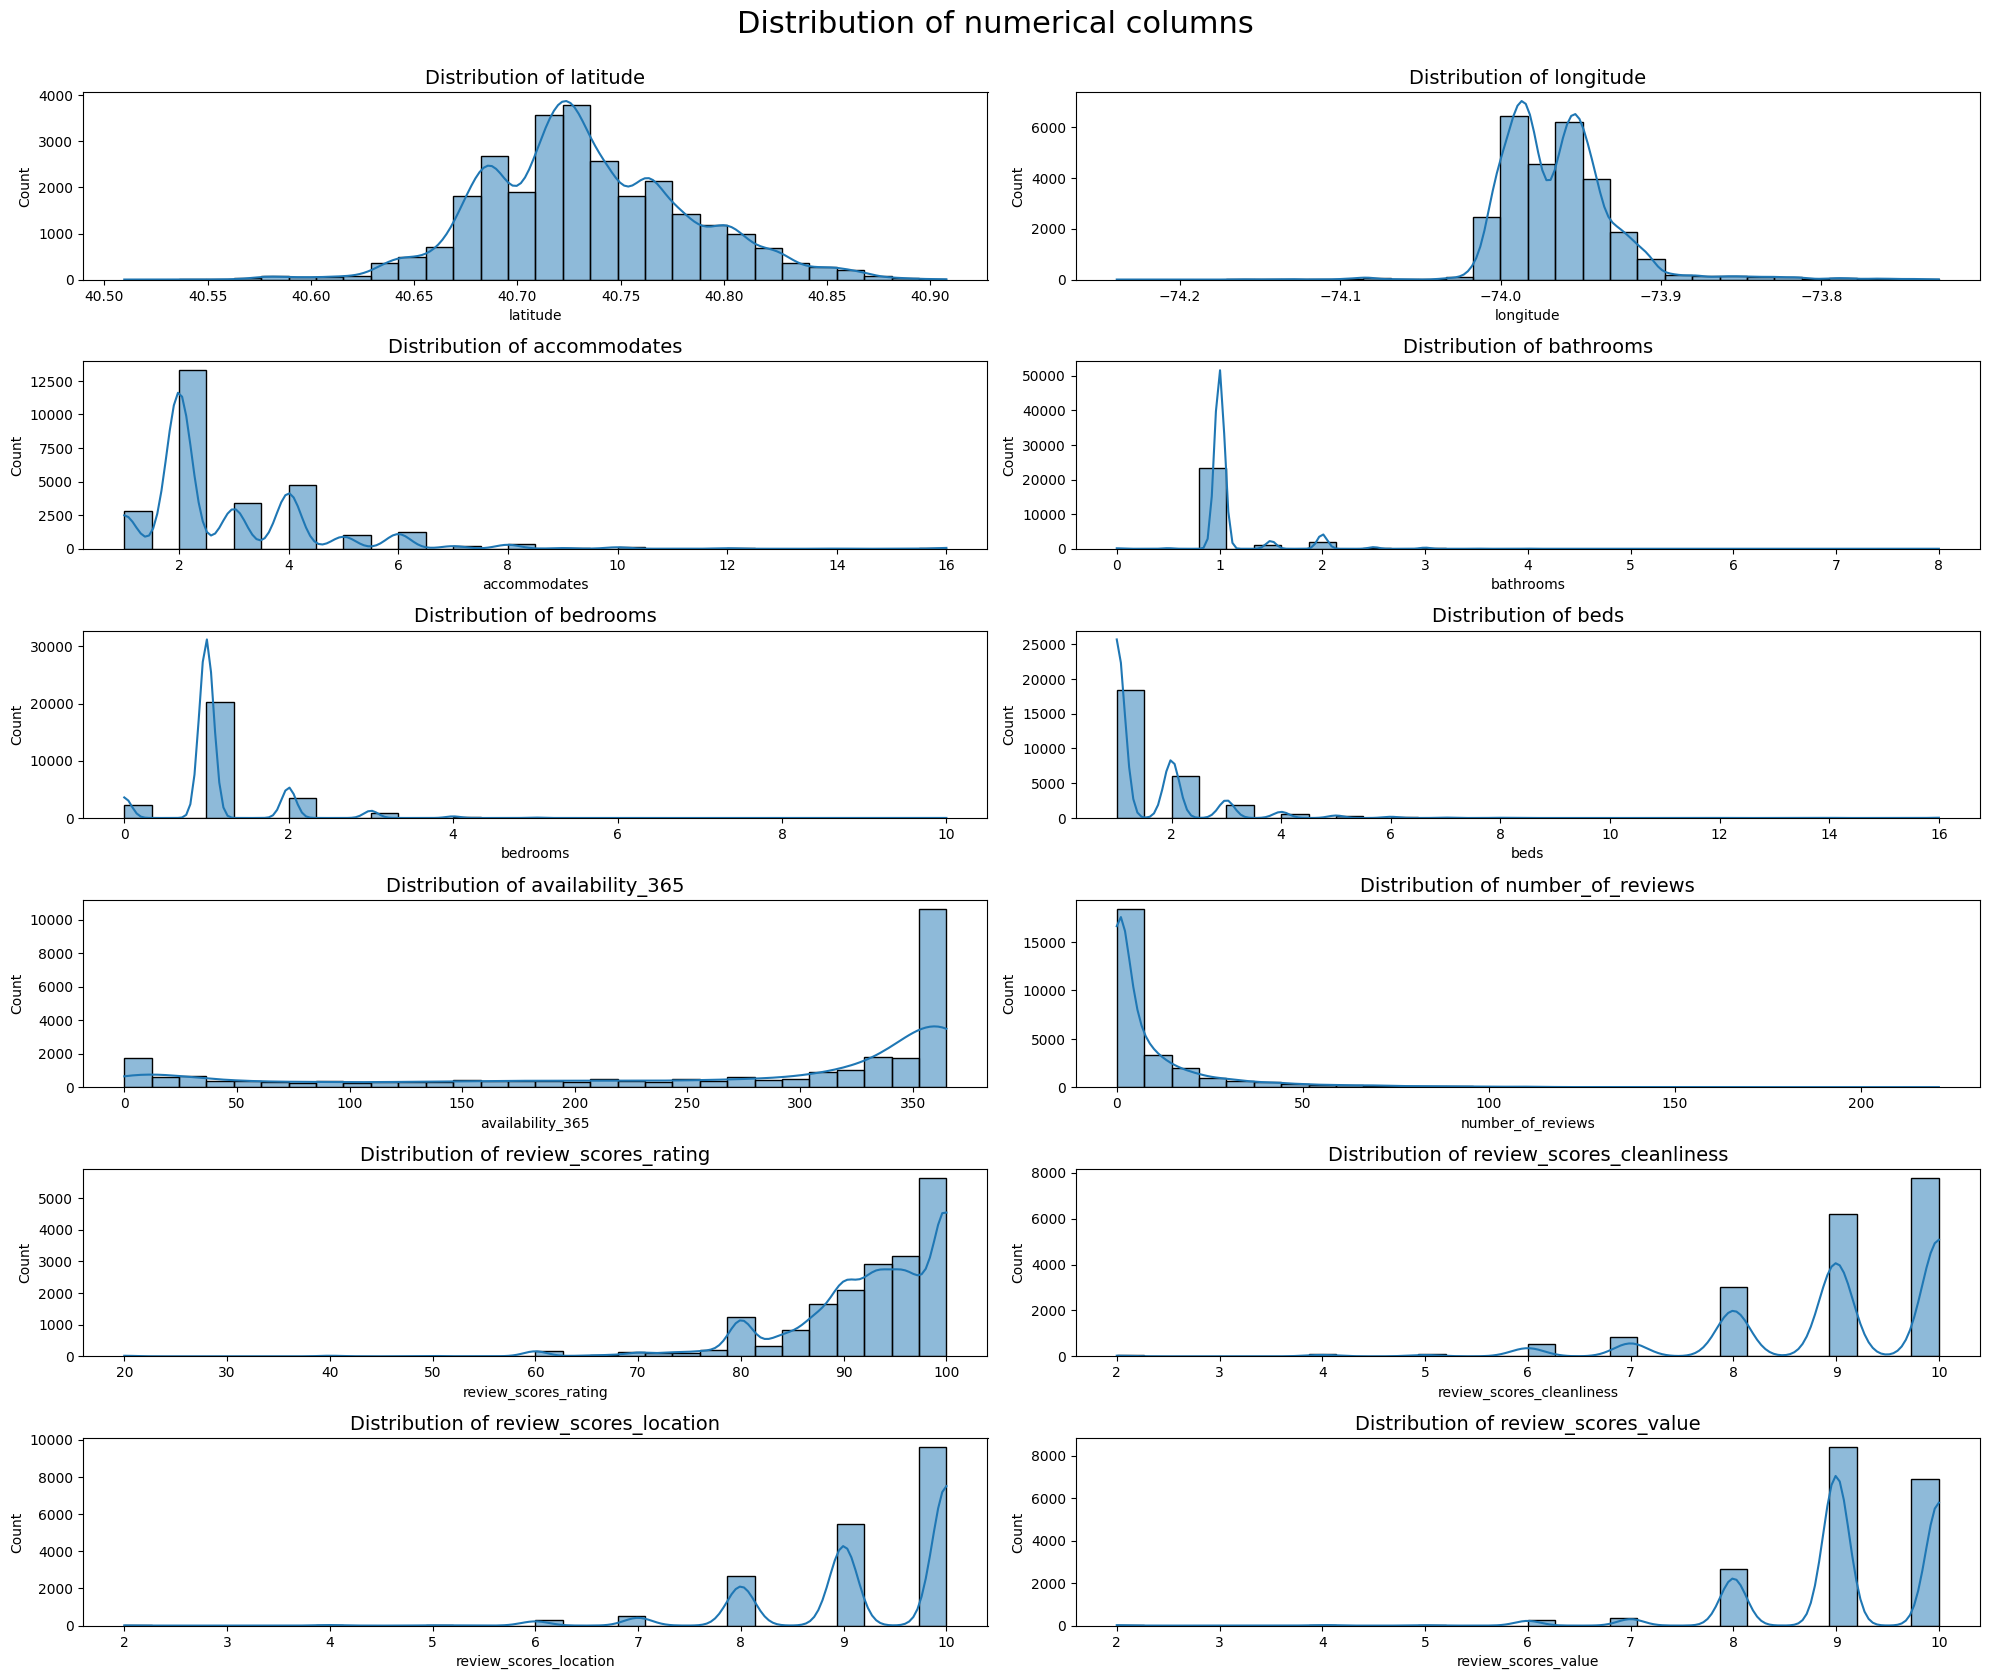

In [271]:
i = 1
plt.figure(figsize=(20, 20))
plt.suptitle('Distribution of numerical columns', fontsize=22, y=0.95)
for col in numerical_cols:
    plt.subplot(7, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    i += 1
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


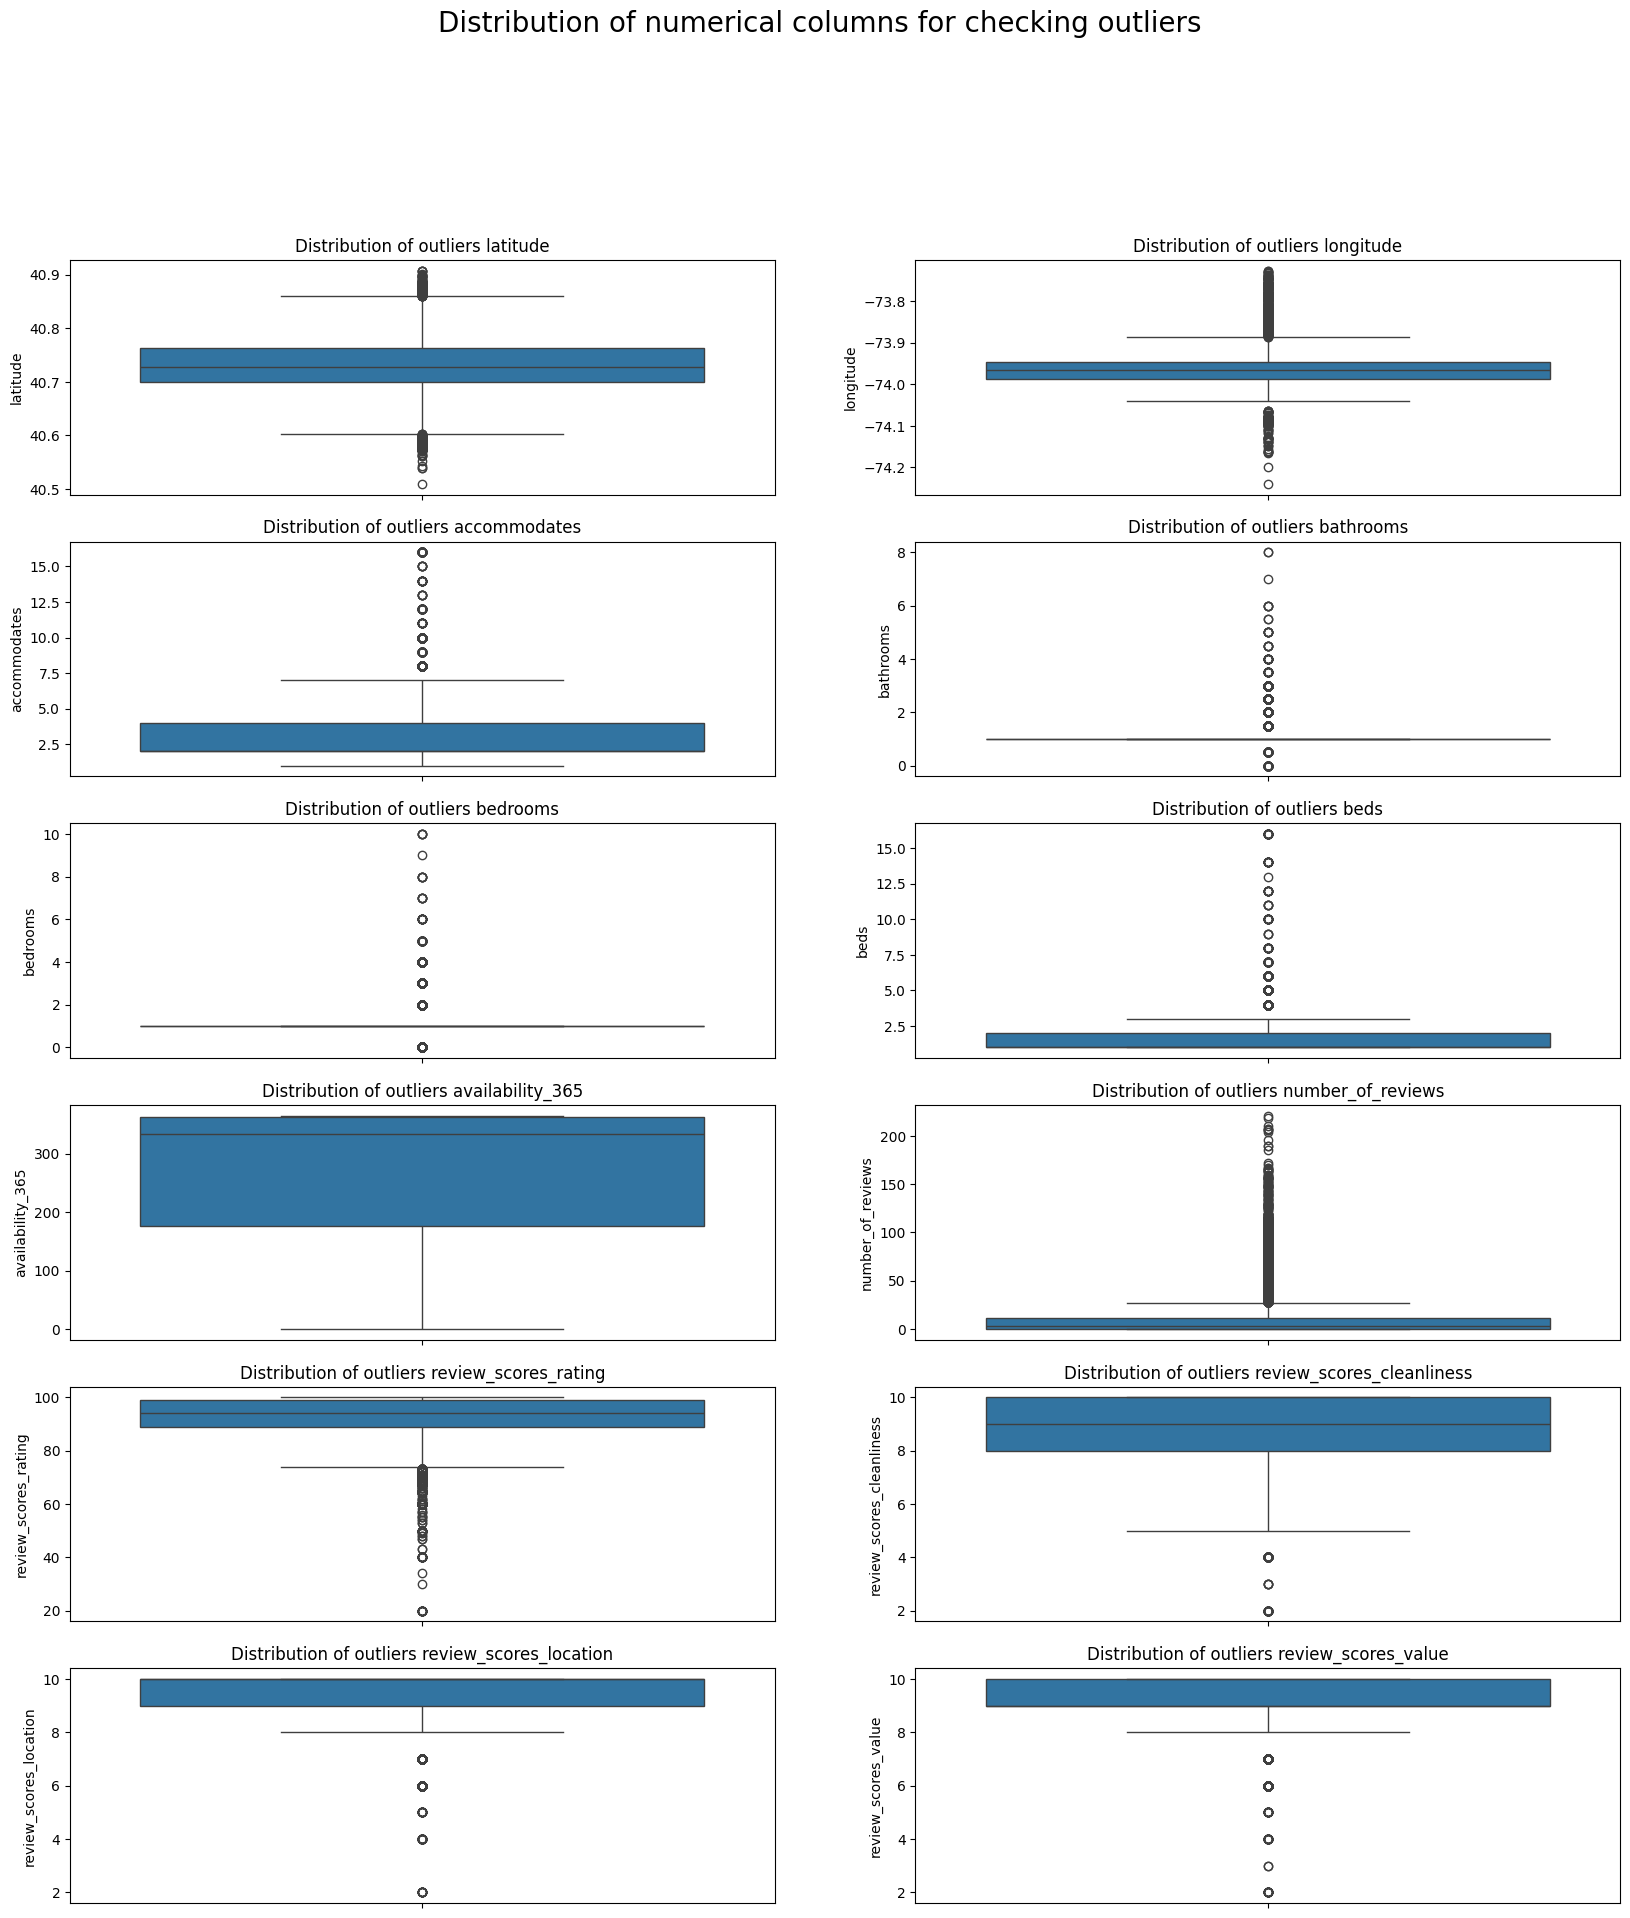

In [272]:
i = 1
plt.figure(figsize=(20,25)).suptitle('Distribution of numerical columns for checking outliers', fontsize=20)
for col in numerical_cols:
    plt.subplot(7,2,i)
    sns.boxplot(df[col])
    plt.title(f'Distribution of outliers {col}')
    i += 1
plt.show()

<h4> BIVARIATE ANALYSIS OF NUMERICAL COLUMNS:- </h4>

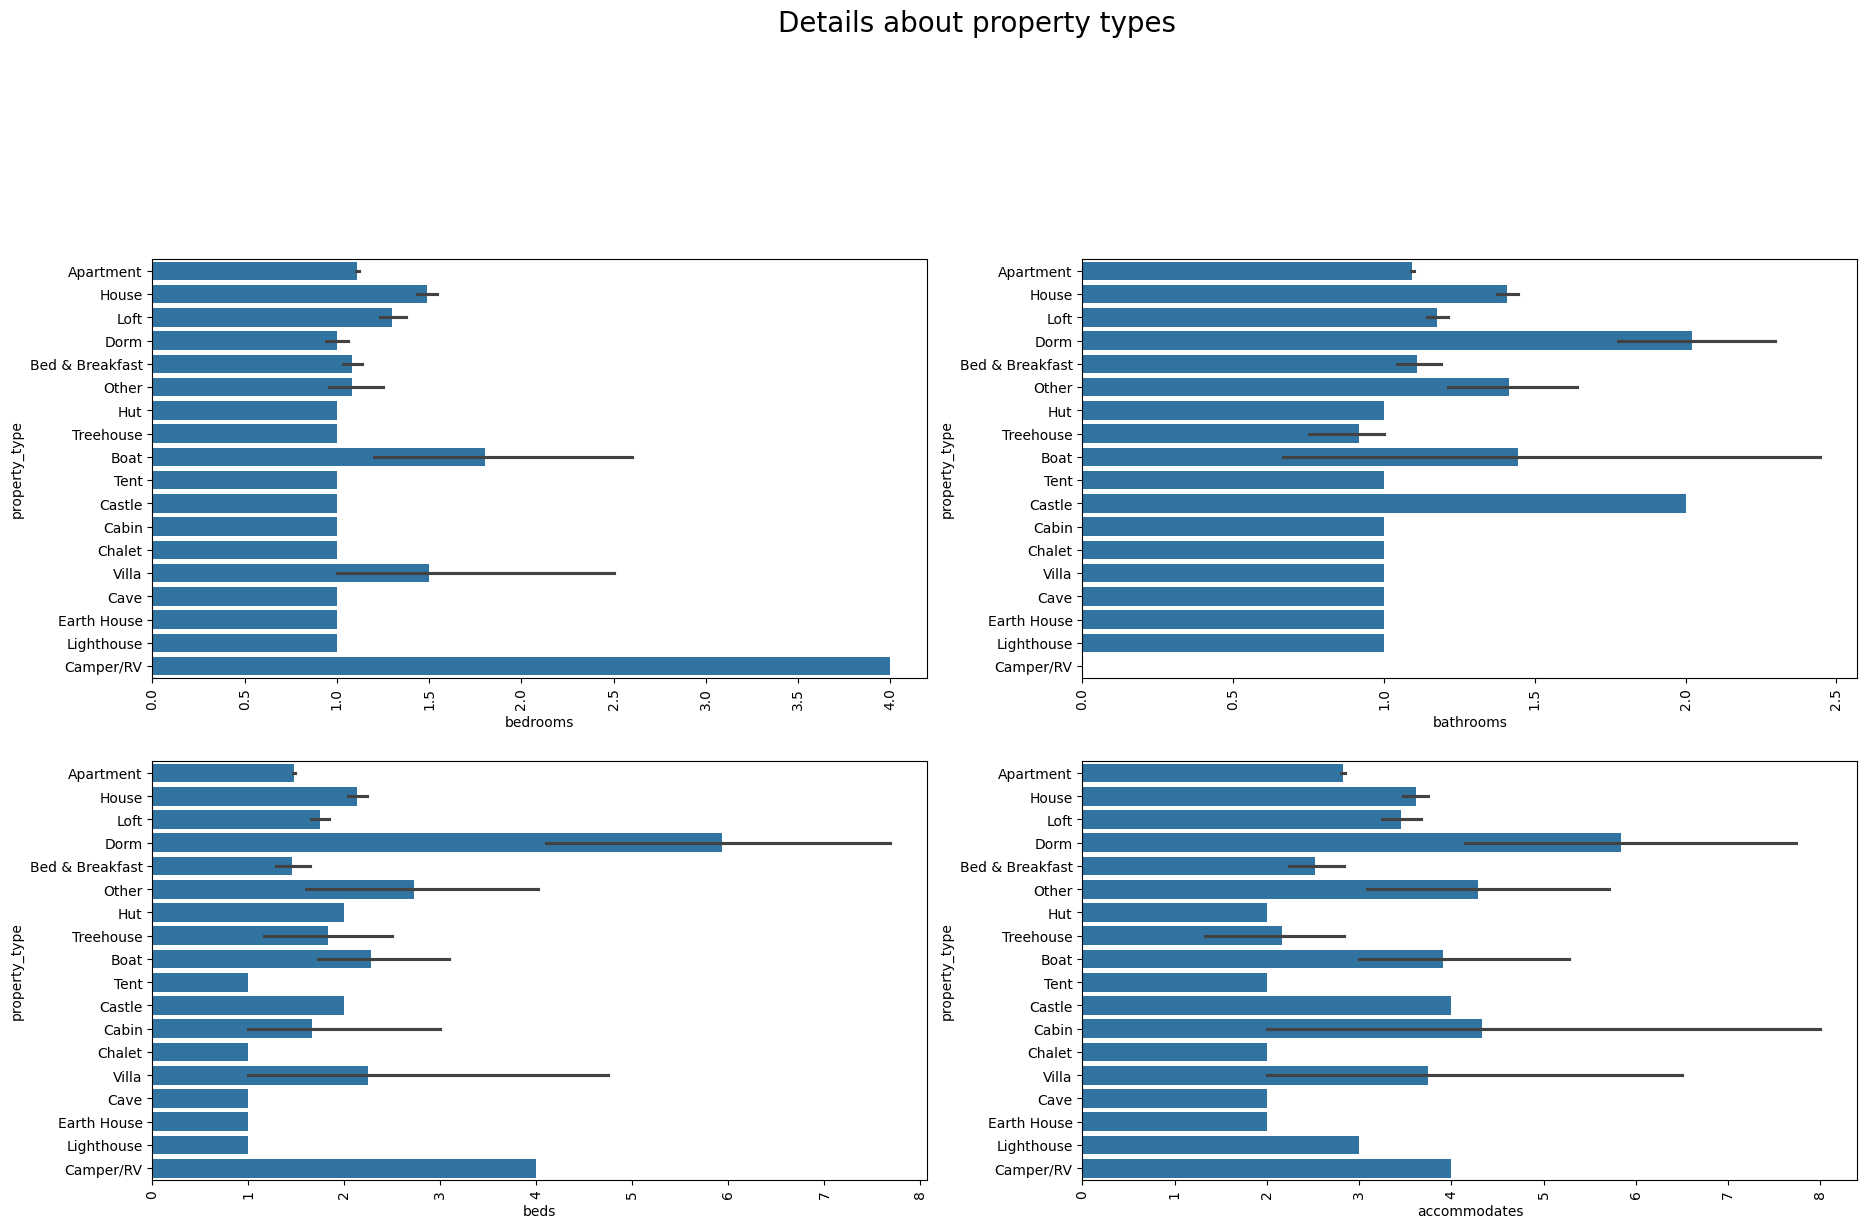

In [273]:
plt.figure(figsize=(22,25)).suptitle('Details about property types', fontsize=20)

plt.subplot(4,2,1)
sns.barplot(data=df, y='property_type', x='bedrooms')
plt.xticks(rotation=90)

plt.subplot(4,2,2)
sns.barplot(data=df, y='property_type', x='bathrooms')
plt.xticks(rotation=90)

plt.subplot(4,2,3)
sns.barplot(data=df, y='property_type', x='beds')
plt.xticks(rotation=90)

plt.subplot(4,2,4)
sns.barplot(data=df, y='property_type', x='accommodates')
plt.xticks(rotation=90)


plt.show()

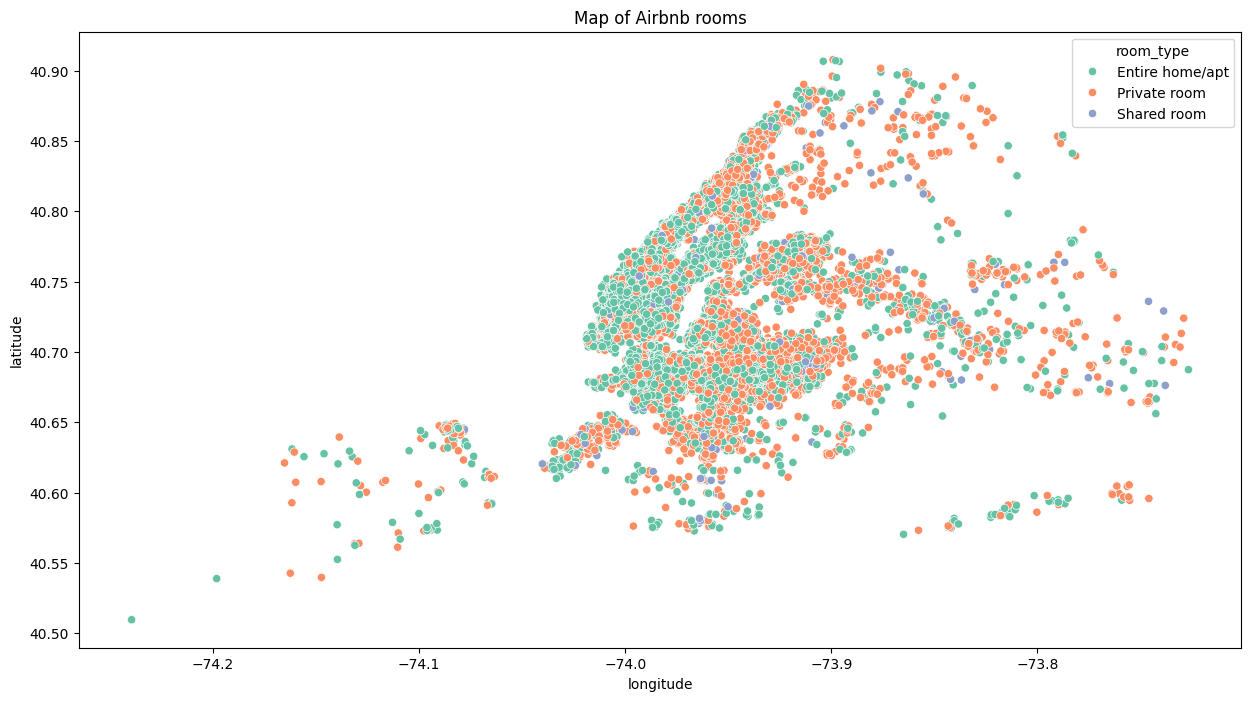

In [274]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=df, y='latitude', x = 'longitude', hue='room_type', palette='Set2'
)
plt.title('Map of Airbnb rooms')
plt.show()

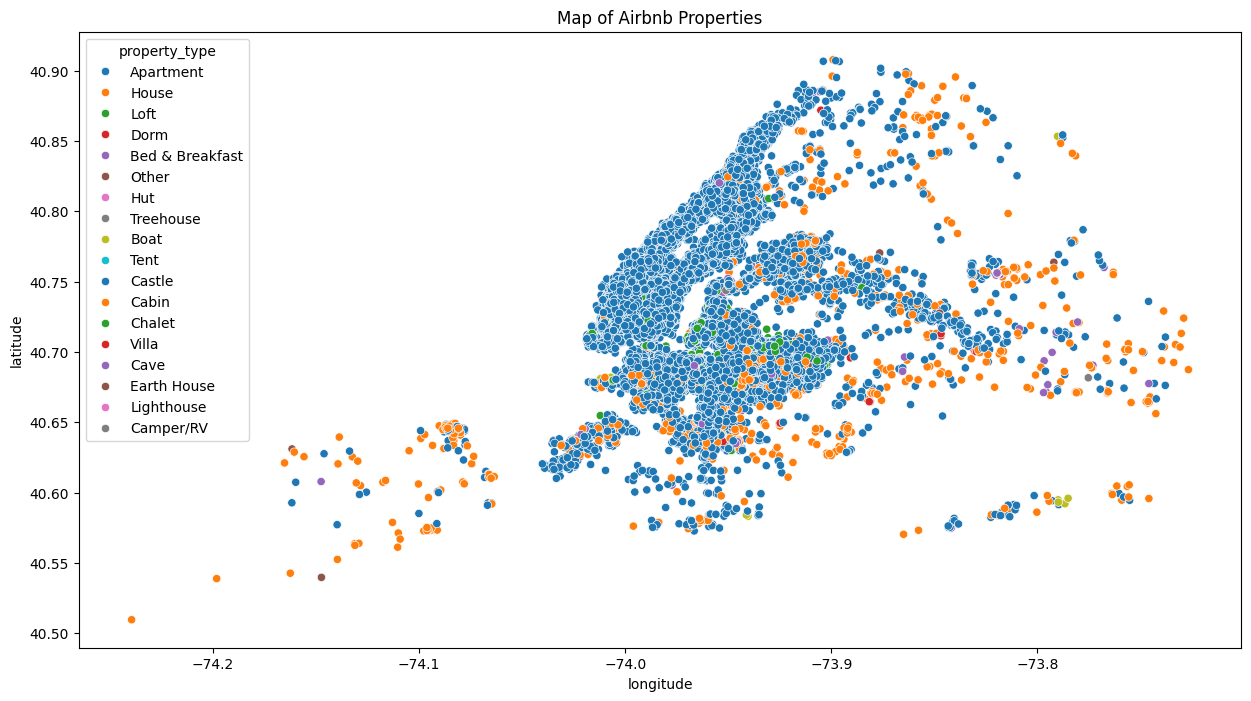

In [275]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=df,
    y = 'latitude',
    x = 'longitude',
    hue='property_type',
    palette=sns.color_palette('tab10')
)
plt.title('Map of Airbnb Properties')
plt.show()

##### CORRELATION MATRIX:-

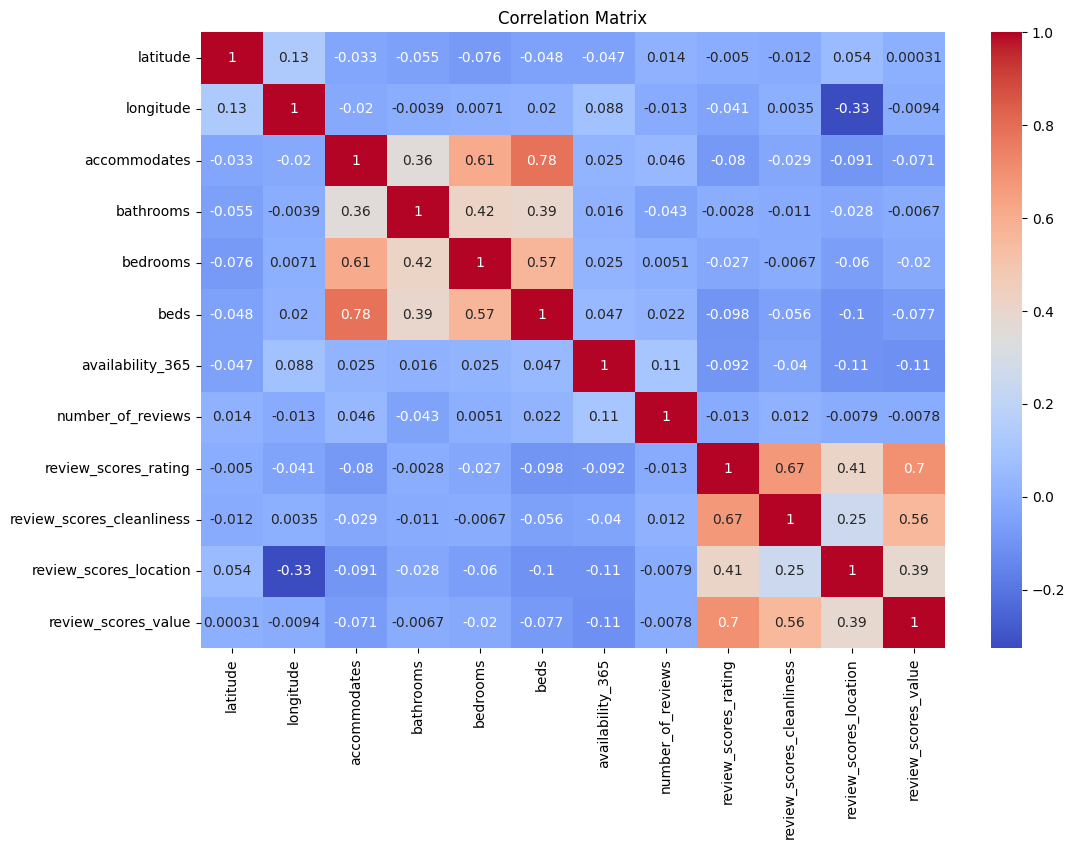

In [276]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<h3>Comments on Univariate and Bivariate Analysis of numerical columns:-</h3>

#### **a. Range of Attributes**
- **Price:** Ranges from $10 to $8,000, with most listings priced under $200. High-end properties are outliers.
- **Bedrooms/Bathrooms:** Most properties have 1–3 bedrooms and 1–2 bathrooms. Larger properties (>8 bedrooms) are rare.
- **Accommodates:** Ranges from 1 to 10+ guests, concentrated around 2–4 guests.
- **Number of Reviews:** Varies widely, with most listings having fewer than 20 reviews, but some exceeding 200.
- **Latitude/Longitude:** Listings are concentrated in New York City, with dense clusters in Manhattan and Brooklyn.

#### **b. Outliers**
- **Price:** Significant outliers above $1,000, likely luxury listings.
- **Bedrooms/Bathrooms:** Outliers with large numbers of bedrooms or bathrooms represent group-friendly properties.
- **Square Feet:** Rare listings exceed 10,000 sq ft, representing atypical properties like mansions.
- **Number of Reviews:** Some listings have extremely high review counts (>100), reflecting popularity or long tenure.

#### **c. Distribution and Relationships**
- **Price:** Heavily skewed distribution with most values on the lower end.
- **Bedrooms, Bathrooms, Accommodates:** Positive correlation; larger properties accommodate more guests.
- **Property Type:** Houses and villas have more bedrooms/bathrooms, while apartments dominate urban areas.
- **Room Type:** Entire homes/apartments dominate the market, especially in urban clusters.
- **Geography:** Dense clusters in Manhattan and Brooklyn; suburban listings are sparse.


<h4> UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS:- </h4>

In [277]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() < 185:
        print(col)

less_unique_value_cat_cols = df[[ 'property_type', 'room_type', 'bed_type']]
less_unique_value_cat_cols

property_type
room_type
bed_type


,property_type,room_type,bed_type
0,Apartment,Entire home/apt,Real Bed
1,Apartment,Entire home/apt,Real Bed
2,Apartment,Private room,Real Bed
3,Apartment,Entire home/apt,Real Bed
4,Apartment,Entire home/apt,Real Bed
...,...,...,...
27387,Apartment,Entire home/apt,Real Bed
27388,Apartment,Private room,Real Bed
27389,House,Entire home/apt,Real Bed
27390,Apartment,Entire home/apt,Real Bed


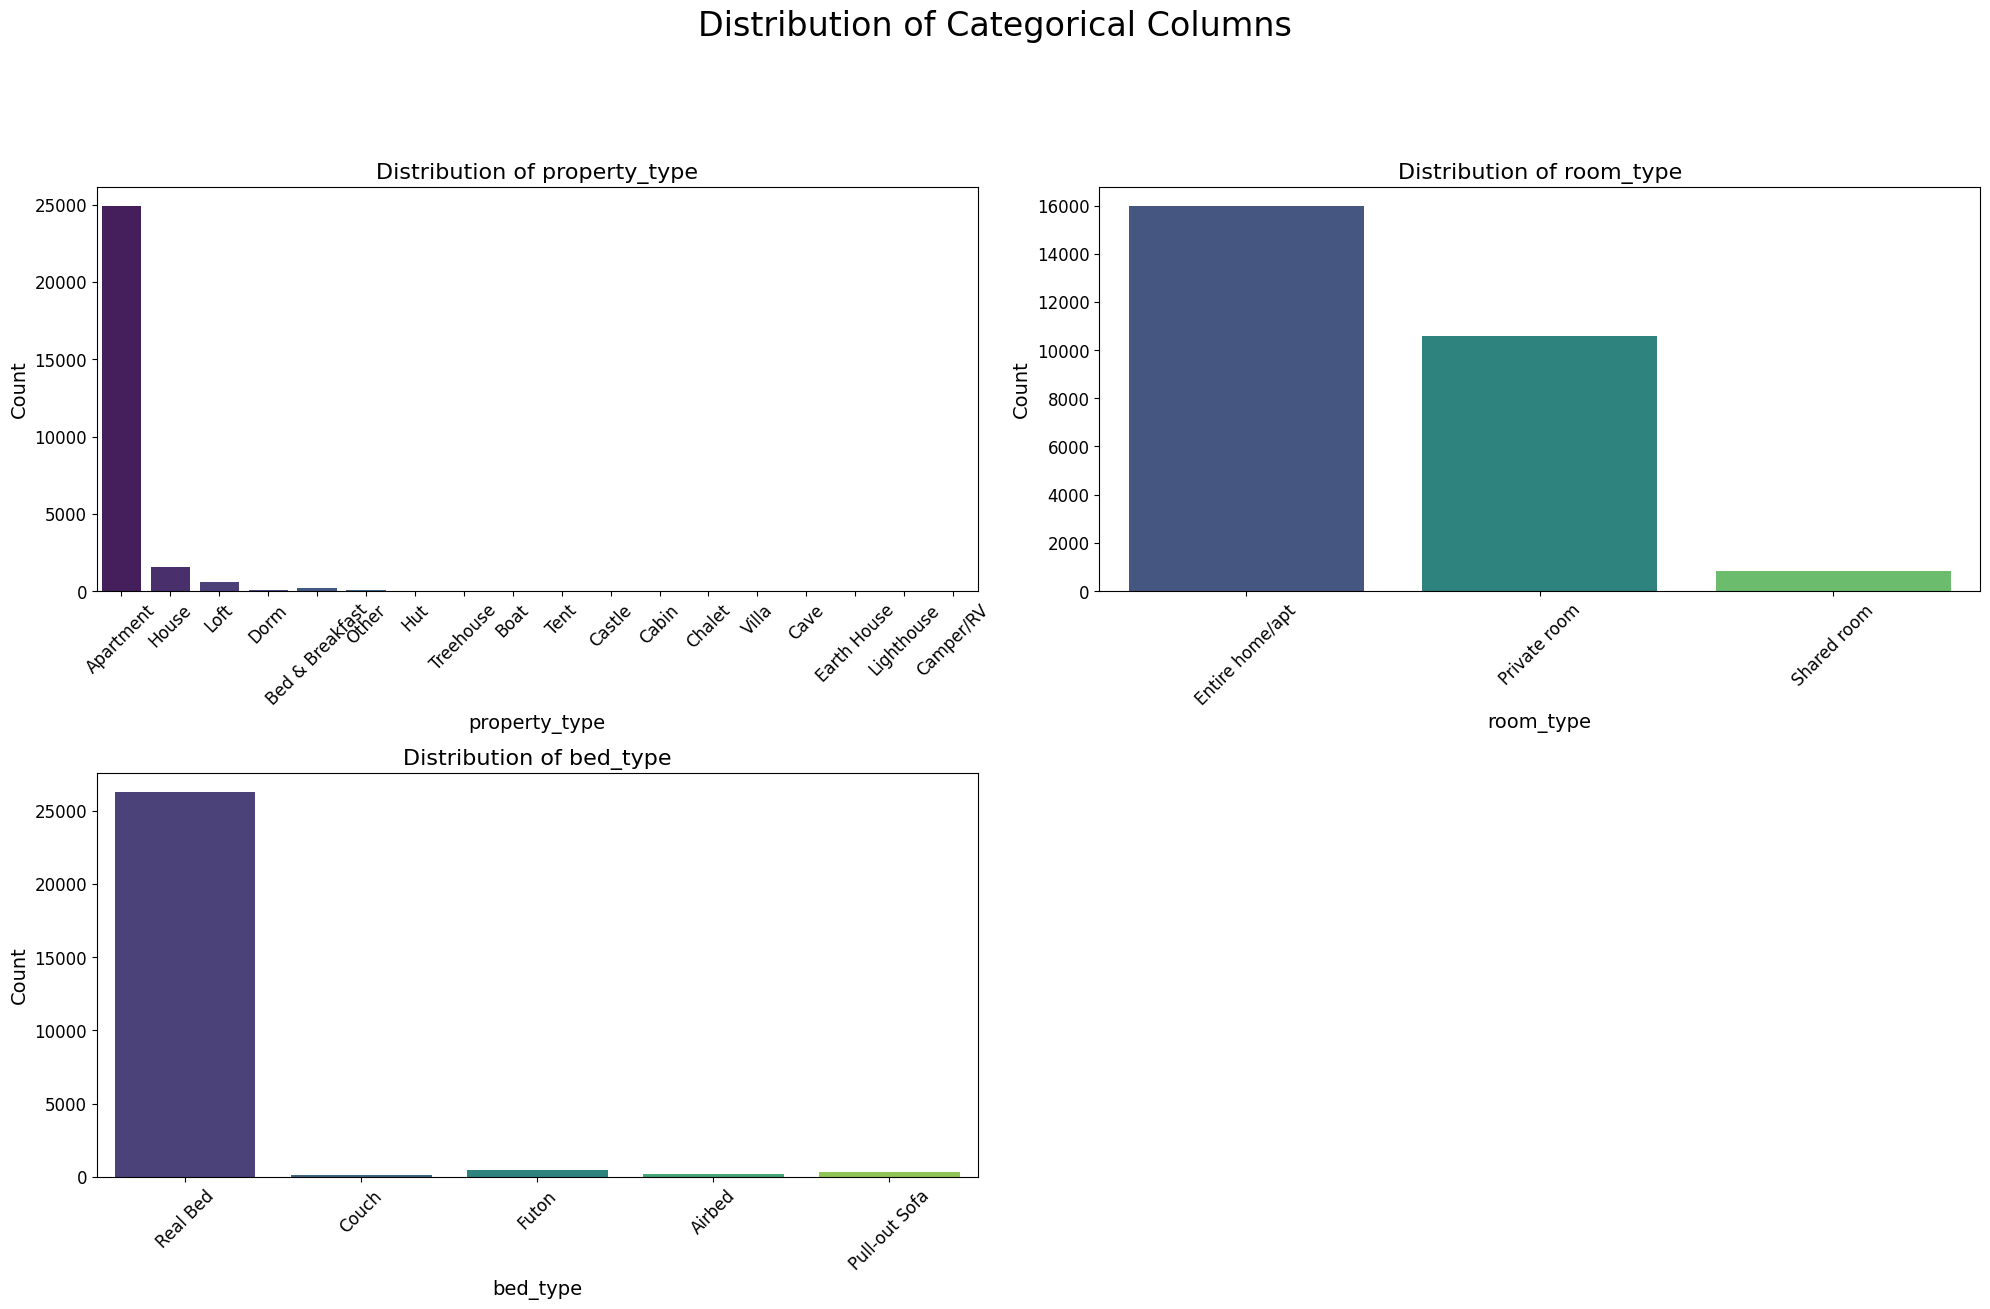

In [278]:
# Visualizing distribution of categorical columns:-

i = 1
plt.figure(figsize=(20, 30))  
plt.suptitle('Distribution of Categorical Columns', fontsize=24, y=0.98)
for col in less_unique_value_cat_cols:
    plt.subplot(5, 2, i)
    sns.countplot(x=df[col], palette="viridis")
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(f'Distribution of {col}', fontsize=16)
    i += 1

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

<h4> BIVARIATE ANALYSIS OF CATEGORICAL COLUMNS:- </h4>

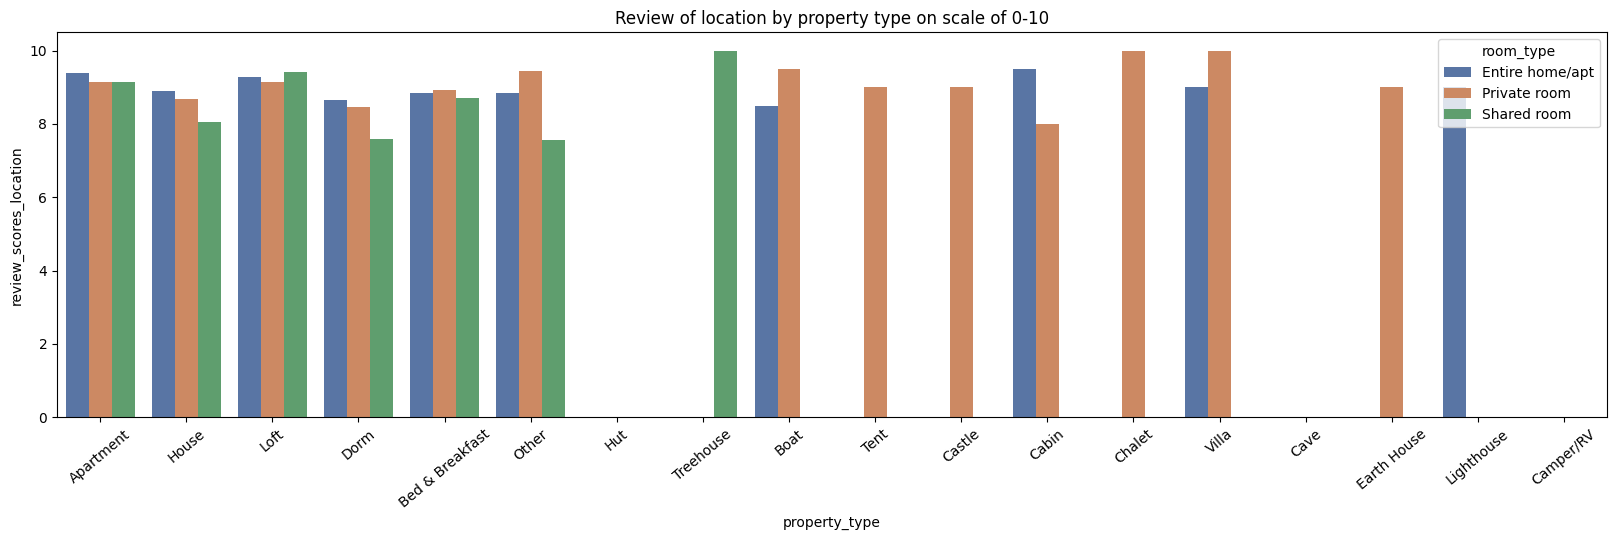

In [279]:
plt.figure(figsize=(20,5))
sns.barplot(
    data=df, y='review_scores_location',
    x = 'property_type',
    hue='room_type',
    palette='deep',
    errorbar=None,
)
plt.title('Review of location by property type on scale of 0-10')
plt.xticks(rotation=40)
plt.show()

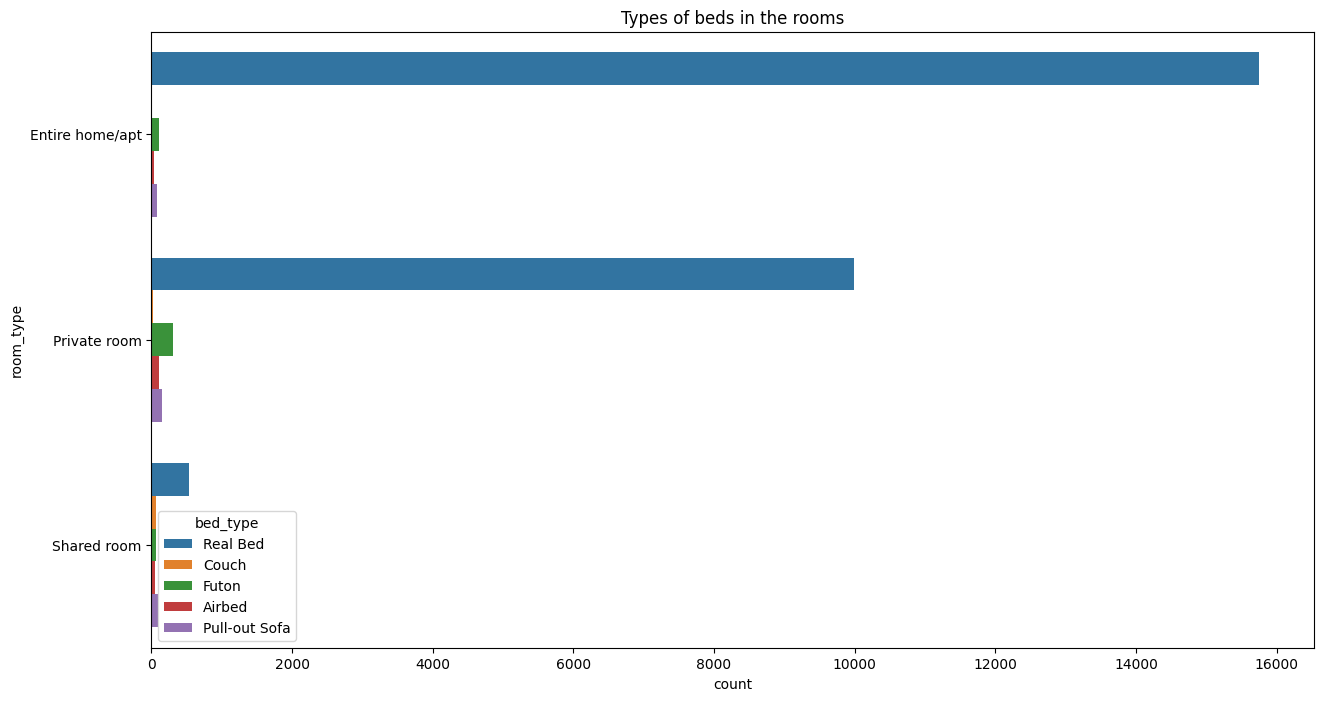

In [280]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, y='room_type', hue='bed_type')
plt.title('Types of beds in the rooms')
plt.show()

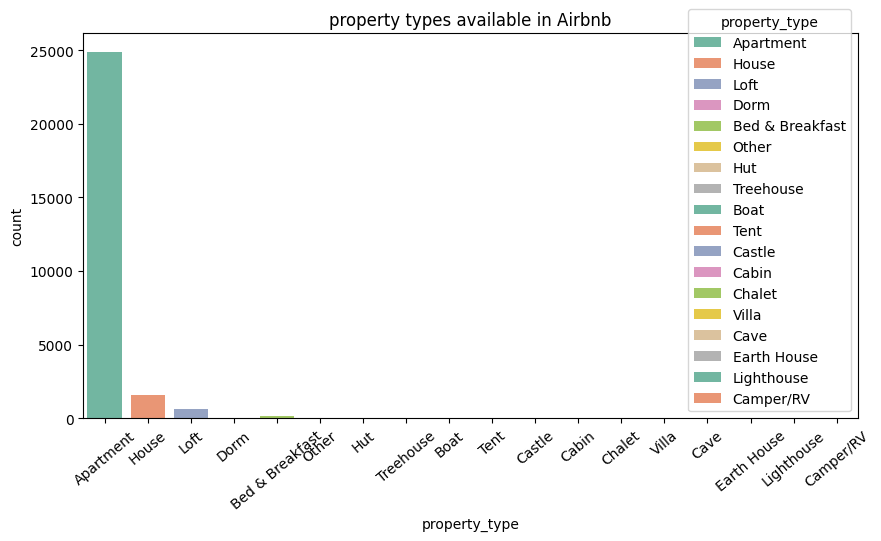

In [281]:
plt.figure(figsize=(10,5))
plt.title('property types available in Airbnb')
sns.countplot(x='property_type', data=df, palette='Set2', hue='property_type')
plt.xticks(rotation=40)
plt.show()

<h3>Comments on Univariate and Bivariate Analysis of categorical columns:-</h3>


#### **a. Range of Attributes**
- **Property Type:** Includes 18 unique categories, with "Apartment" being the most common, followed by "House." Rare property types like "Boat" or "Treehouse" are also present.
- **Room Type:** Includes 3 categories: "Entire home/apt," "Private room," and "Shared room," with "Entire home/apt" dominating.
- **Bed Type:** Includes 5 categories, with "Real Bed" being the most frequent.

#### **b. Outliers of Various Attributes**
- **Property Type:** Certain property types (e.g., "Boat," "Treehouse") are outliers due to their low counts.
- **Room Type:** No significant outliers as the distribution aligns with expectations.
- **Bed Type:** Categories like "Couch" and "Airbed" are outliers with minimal representation.

#### **c. On Distribution and Relationships**
- **Property Type Distribution:** "Apartments" dominate the listings, reflecting urban settings, while less common property types cater to niche markets.
- **Room Type vs. Property Type:** Barplots show that "Entire home/apt" is the most common across all property types, while private rooms are more frequent in houses.
- **Review Scores by Property Type and Room Type:** Apartments and entire homes tend to have higher location review scores (8–10), indicating guest preference for private spaces.
- **Bed Type vs. Room Type:** "Real Bed" dominates all room types, while alternative beds (e.g., "Airbed") are mostly in shared or private rooms.


<hr>

<h1> 2. DATA PREPROCESSING :- </h1>

<h3> (a) DUPLICATE VALUE CHECK:- </h3>

In [282]:
# Check for Duplicates
duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

# Remove Duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Number of Duplicate Rows: 0
Shape after removing duplicates: (27392, 17)


<h3>(b) MISSING VALUE TREATEMENT:- </h3>

In [283]:
df.isna().sum()[df.isna().sum() > 0]

zipcode                       162
property_type                   6
bathrooms                     463
bedrooms                      140
beds                           98
review_scores_rating         8657
review_scores_cleanliness    8731
review_scores_location       8732
review_scores_value          8734
dtype: int64

In [284]:
df['zipcode'] = df['zipcode'].fillna('Unknown')
df['zipcode']

0        10022-4175
1           Unknown
2             11221
3             10011
4             10011
            ...    
27387         10016
27388         10019
27389         10301
27390         11213
27391         10018
Name: zipcode, Length: 27392, dtype: object

In [285]:
df['zipcode'].isna().sum()

np.int64(0)

In [286]:
mode_property = df['property_type'].mode()[0]

In [287]:
df['property_type'] = df['property_type'].fillna(mode_property)
df['property_type']

0        Apartment
1        Apartment
2        Apartment
3        Apartment
4        Apartment
           ...    
27387    Apartment
27388    Apartment
27389        House
27390    Apartment
27391    Apartment
Name: property_type, Length: 27392, dtype: object

In [288]:
df['property_type'].isna().sum()

np.int64(0)

In [289]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

<h3>(c) OUTLIER TREATMENT :- </h3>

In [290]:
# Capping outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

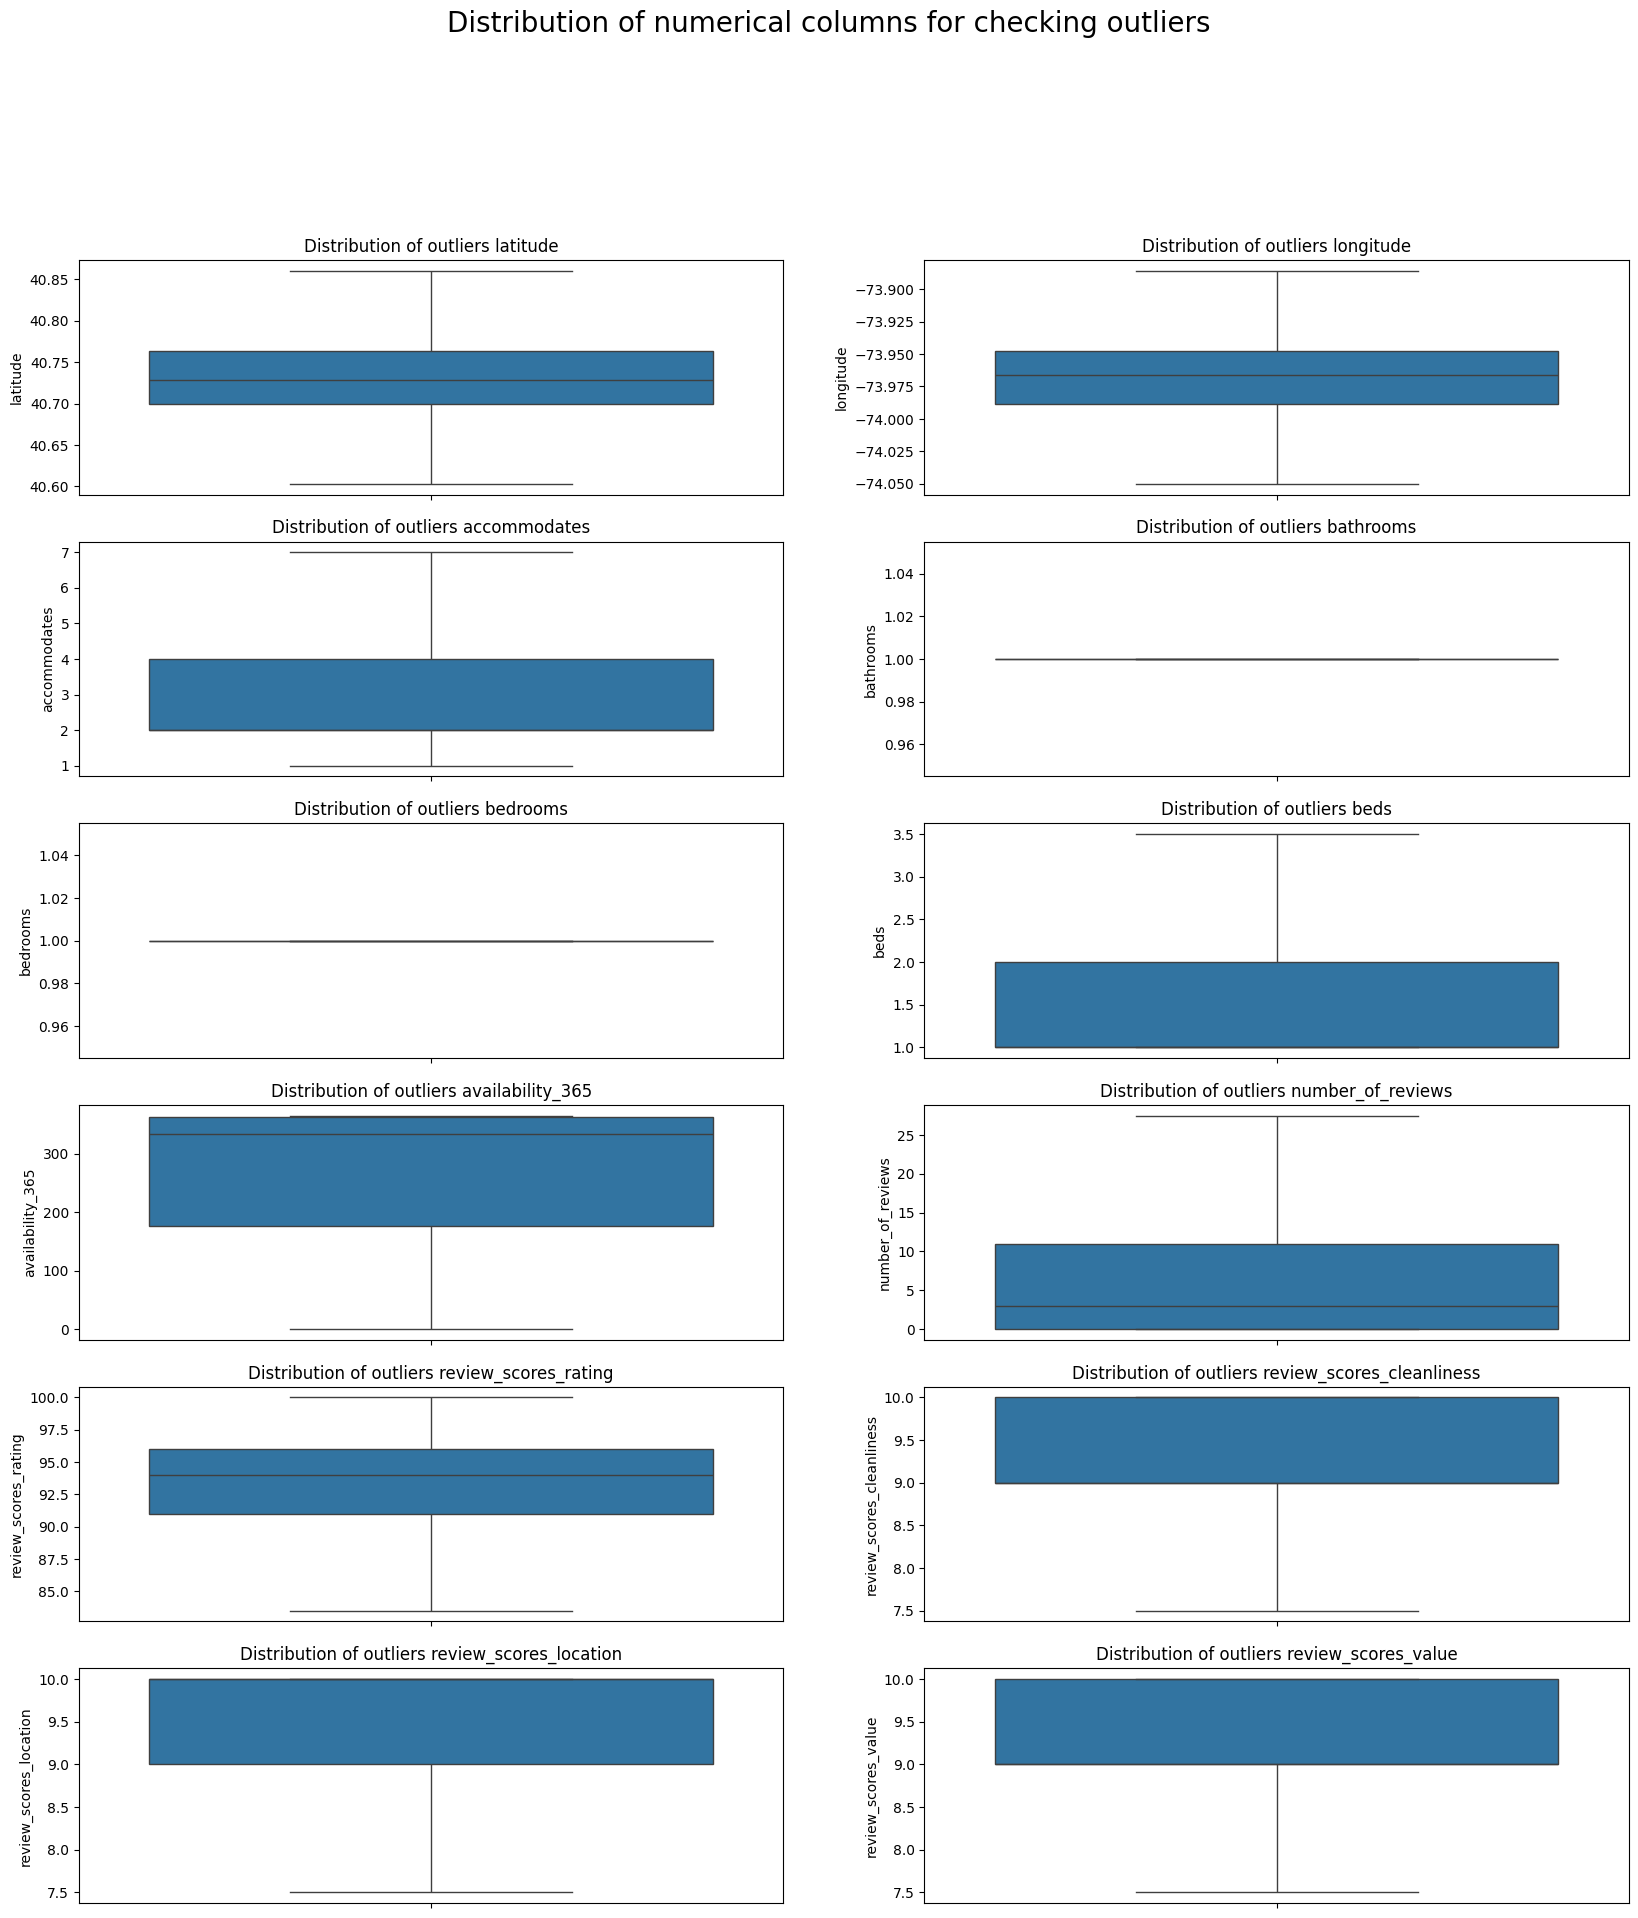

In [291]:
# Visualizing Outliers after treatment

i = 1
plt.figure(figsize=(20,25)).suptitle('Distribution of numerical columns for checking outliers', fontsize=20)
for col in numerical_cols:
    plt.subplot(7,2,i)
    sns.boxplot(df[col])
    plt.title(f'Distribution of outliers {col}')
    i += 1
plt.show()

<h3>(d) ENCODING CATEGORICAL COLUMNS:- </h3>

In [292]:
df.select_dtypes(include='object').nunique()

zipcode          186
property_type     18
room_type          3
bed_type           5
price            452
dtype: int64

In [293]:
df['price']

0        $160.00 
1        $105.00 
2         $58.00 
3        $185.00 
4        $195.00 
           ...   
27387    $130.00 
27388    $139.00 
27389     $99.00 
27390     $55.00 
27391    $110.00 
Name: price, Length: 27392, dtype: object

In [294]:
import re
def clean_target_column(df, column): 
    df[column] = df[column].apply(lambda x: re.sub(r'[^\d.]', '',x))
    df[column] = pd.to_numeric(df[column])
    return df[column]


In [295]:
df['price'] = clean_target_column(df,'price')
target = df['price']
target

0        160.0
1        105.0
2         58.0
3        185.0
4        195.0
         ...  
27387    130.0
27388    139.0
27389     99.0
27390     55.0
27391    110.0
Name: price, Length: 27392, dtype: float64

In [296]:
# Adding new column which calculates the price per guest (accommodation), which is derived by dividing the price of the listing by the number of guests it accommodates (accommodates).

df['price_per_accommodation'] = df['price']/df['accommodates'] 
df['price_per_accommodation']

0         80.000000
1         15.000000
2         29.000000
3         92.500000
4         97.500000
            ...    
27387     65.000000
27388     69.500000
27389     16.500000
27390     18.333333
27391    110.000000
Name: price_per_accommodation, Length: 27392, dtype: float64

In [297]:
from sklearn.preprocessing import LabelEncoder


In [298]:
for col in df.select_dtypes(include='object'):
    lab = LabelEncoder()
    df[col] = lab.fit_transform(df[col]) + 1 

In [299]:
df.head()

,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_accommodation
0,23,40.756852,-73.964754,1,1,2,1.0,1.0,1.0,5,160.0,322,27.5,86.0,7.5,10.0,9.0,80.0
1,186,40.830599,-73.941014,1,1,7,1.0,1.0,3.0,5,105.0,348,22.0,85.0,8.0,7.5,8.0,15.0
2,118,40.692189,-73.924120,1,2,2,1.0,1.0,2.0,5,58.0,227,27.5,98.0,10.0,9.0,10.0,29.0
3,13,40.734751,-74.002592,1,1,2,1.0,1.0,1.0,5,185.0,274,26.0,96.0,9.0,10.0,9.0,92.5
4,13,40.745282,-73.997836,1,1,2,1.0,1.0,2.0,5,195.0,365,1.0,100.0,10.0,10.0,10.0,97.5


In [300]:
df.select_dtypes(include=['float64', 'int64'])

,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_accommodation
0,23,40.756852,-73.964754,1,1,2,1.0,1.0,1.0,5,160.0,322,27.5,86.0,7.5,10.0,9.0,80.000000
1,186,40.830599,-73.941014,1,1,7,1.0,1.0,3.0,5,105.0,348,22.0,85.0,8.0,7.5,8.0,15.000000
2,118,40.692189,-73.924120,1,2,2,1.0,1.0,2.0,5,58.0,227,27.5,98.0,10.0,9.0,10.0,29.000000
3,13,40.734751,-74.002592,1,1,2,1.0,1.0,1.0,5,185.0,274,26.0,96.0,9.0,10.0,9.0,92.500000
4,13,40.745282,-73.997836,1,1,2,1.0,1.0,2.0,5,195.0,365,1.0,100.0,10.0,10.0,10.0,97.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27387,17,40.742363,-73.981968,1,1,2,1.0,1.0,1.0,5,130.0,365,3.0,98.0,9.0,10.0,9.0,65.000000
27388,20,40.759642,-73.985343,1,2,2,1.0,1.0,1.0,5,139.0,332,27.5,95.0,9.0,10.0,9.0,69.500000
27389,54,40.645741,-74.050232,11,1,6,1.0,1.0,3.0,5,99.0,357,2.0,90.0,9.0,9.0,8.0,16.500000
27390,110,40.669931,-73.946820,1,1,3,1.0,1.0,1.0,5,55.0,93,3.0,100.0,10.0,9.0,10.0,18.333333


<h3>(f) SCALING:- </h3>

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
X = df.drop('price', axis=1)
X

,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_accommodation
0,23,40.756852,-73.964754,1,1,2,1.0,1.0,1.0,5,322,27.5,86.0,7.5,10.0,9.0,80.000000
1,186,40.830599,-73.941014,1,1,7,1.0,1.0,3.0,5,348,22.0,85.0,8.0,7.5,8.0,15.000000
2,118,40.692189,-73.924120,1,2,2,1.0,1.0,2.0,5,227,27.5,98.0,10.0,9.0,10.0,29.000000
3,13,40.734751,-74.002592,1,1,2,1.0,1.0,1.0,5,274,26.0,96.0,9.0,10.0,9.0,92.500000
4,13,40.745282,-73.997836,1,1,2,1.0,1.0,2.0,5,365,1.0,100.0,10.0,10.0,10.0,97.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27387,17,40.742363,-73.981968,1,1,2,1.0,1.0,1.0,5,365,3.0,98.0,9.0,10.0,9.0,65.000000
27388,20,40.759642,-73.985343,1,2,2,1.0,1.0,1.0,5,332,27.5,95.0,9.0,10.0,9.0,69.500000
27389,54,40.645741,-74.050232,11,1,6,1.0,1.0,3.0,5,357,2.0,90.0,9.0,9.0,8.0,16.500000
27390,110,40.669931,-73.946820,1,1,3,1.0,1.0,1.0,5,93,3.0,100.0,10.0,9.0,10.0,18.333333


In [303]:
y = target
y

0        160.0
1        105.0
2         58.0
3        185.0
4        195.0
         ...  
27387    130.0
27388    139.0
27389     99.0
27390     55.0
27391    110.0
Name: price, Length: 27392, dtype: float64

In [304]:
X_train_cv, X_test , y_train_cv, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [305]:
X_train, X_val , y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.2, random_state = 0)

In [306]:
X_train.shape, y_train.shape

((17530, 17), (17530,))

In [307]:
X_val.shape, y_val.shape

((4383, 17), (4383,))

In [308]:
X_test.shape, y_test.shape

((5479, 17), (5479,))

In [309]:
from sklearn.preprocessing import StandardScaler

In [310]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [311]:
X_val_scaled = scaler.transform(X_val)
X_val_scaled

array([[ 0.64238468,  0.88374885,  1.96175454, ..., -0.68847584,
        -0.18150338, -0.65952263],
       [-0.97965398, -0.00495865, -1.00651225, ...,  0.63509509,
        -0.18150338, -0.20410115],
       [-0.76206343,  1.00226361, -0.64874367, ...,  0.63509509,
        -0.18150338,  0.71812733],
       ...,
       [-0.34666329,  0.61089645,  0.15339411, ..., -2.01204678,
        -1.78198336,  0.37656123],
       [ 0.72150852, -0.97055074, -0.85144009, ...,  0.63509509,
        -0.18150338, -0.30657098],
       [-0.22797753, -0.46615044, -1.7223143 , ...,  0.63509509,
         1.4189766 , -0.05039641]])

In [312]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.17647058, -1.42068939,  0.42025791, ...,  0.63509509,
         1.4189766 ,  0.06915173],
       [-0.5840348 ,  1.85600648,  0.4239086 , ..., -2.01204678,
        -0.18150338, -0.37488421],
       [ 0.42479413,  2.6464609 ,  2.6790191 , ...,  0.63509509,
        -0.18150338, -0.47735404],
       ...,
       [ 1.41384209, -1.02830032,  0.33573546, ..., -2.01204678,
        -1.78198336, -0.56843833],
       [-1.19724454, -0.31147078, -0.61861408, ..., -2.01204678,
        -0.18150338, -0.0333181 ],
       [ 1.09734674, -0.77947934,  1.35699239, ..., -2.01204678,
        -1.78198336,  0.06915173]])

<hr>

<h1>3. MODEL BUILDING WITH HYPERPARAMETER TUNING:- </h1>

<h3>(a) LINEAR REGRESSION WITH REGULARIZATION:-</h3>

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [314]:
# Building simple linear regression model:-

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_train_pred = linear_model.predict(X_train_scaled)
y_val_pred = linear_model.predict(X_val_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

print('Linear Regression Scores:-\n')

print(f'Train accuracy :{(linear_model.score(X_train_scaled, y_train)*100 ):.2f}')
print(f'Validation Accuracy : {(linear_model.score(X_val_scaled, y_val)*100):.2f}')
print(f'Test accuracy : {(linear_model.score(X_test_scaled, y_test)*100):.2f}')

print('\nLinear Regression Errors:-\n')

print(f'MSE Train: {mean_squared_error(y_train, y_train_pred):.2f}')
print(f'MSE validation: {mean_squared_error(y_val, y_val_pred):.2f}')
print(f'MSE Test: {mean_squared_error(y_test, y_test_pred):.2f}')


Linear Regression Scores:-

Train accuracy :68.14
Validation Accuracy : 71.03
Test accuracy : 76.52

Linear Regression Errors:-

MSE Train: 17378.53
MSE validation: 12387.99
MSE Test: 10245.52


In [315]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [316]:
# Applying regularization by implimenting ridge regression using GridSearchCv:- 

ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10]}  
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_
y_train_pred_ridge = best_ridge.predict(X_train_scaled)
y_test_pred_ridge = best_ridge.predict(X_test_scaled)
y_val_pred_ridge = best_ridge.predict(X_val_scaled)


ridge_train_mse = mean_squared_error(y_train, y_train_pred_ridge) 
ridge_val_mse = mean_squared_error(y_val, y_val_pred_ridge)
ridge_test_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_train_r2 = r2_score(y_train, y_train_pred_ridge)
ridge_val_r2 =  r2_score(y_val, y_val_pred_ridge)
ridge_test_r2 = r2_score(y_test, y_test_pred_ridge)

print("Ridge Regression Scores:-\n")

print("Best Alpha:", ridge_grid.best_params_['alpha'])
print(f'Ridge Train accuracy : {(ridge_train_r2)*100:.2f}')
print(f'Ridge Validation Accuracy : {(ridge_val_r2)*100:.2f}' )
print(f'Ridge Test accuracy : {(ridge_test_r2)*100:.2f}')

print("\nRidge Regression Errors:-\n")

print(f'Ridge MSE Train: {ridge_train_mse:.2f} ')
print(f'Ridge MSE validation: {ridge_val_mse:.2f}')
print(f'Ridge MSE Test: {ridge_test_mse:.2f}')


Ridge Regression Scores:-

Best Alpha: 10
Ridge Train accuracy : 68.14
Ridge Validation Accuracy : 71.02
Ridge Test accuracy : 76.50

Ridge Regression Errors:-

Ridge MSE Train: 17378.56 
Ridge MSE validation: 12390.47
Ridge MSE Test: 10251.72


In [317]:
# Applying regularization by implimenting lasso regression using GridSearchCv:- 

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10]}  
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

best_lasso = lasso_grid.best_estimator_
y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)
y_val_pred_lasso = best_lasso.predict(X_val_scaled)


lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso) 
lasso_val_mse = mean_squared_error(y_val, y_val_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_val_r2 =  r2_score(y_val, y_val_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print("lasso Regression Scores:-\n")

print("Best Alpha:", lasso_grid.best_params_['alpha'])
print(f'lasso Train accuracy : {(lasso_train_r2)*100:.2f}')
print(f'lasso Validation Accuracy : {(lasso_val_r2)*100:.2f}' )
print(f'lasso Test accuracy : {(lasso_test_r2)*100:.2f}')

print("\nlasso Regression Errors:-\n")

print(f'lasso MSE Train: {lasso_train_mse:.2f} ')
print(f'lasso MSE validation: {lasso_val_mse:.2f}')
print(f'lasso MSE Test: {lasso_test_mse:.2f}')

lasso Regression Scores:-

Best Alpha: 1
lasso Train accuracy : 68.12
lasso Validation Accuracy : 71.02
lasso Test accuracy : 76.45

lasso Regression Errors:-

lasso MSE Train: 17391.15 
lasso MSE validation: 12392.70
lasso MSE Test: 10276.45


In [318]:
# Applying regularization by implimenting the combination of ridge and lasso regression(ElasticNet) using GridSearchCv:- 

elastic_net = ElasticNet()
elastic_net_params = {
    'alpha': [0.1, 1, 10, 50],  
    'l1_ratio': [0.2, 0.5, 0.8]        
}
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5)
elastic_net_grid.fit(X_train_scaled, y_train)

best_elastic_net = elastic_net_grid.best_estimator_
y_train_pred_elastic_net = best_elastic_net.predict(X_train_scaled)
y_test_pred_elastic_net = best_elastic_net.predict(X_test_scaled)
y_val_pred_elastic_net = best_elastic_net.predict(X_val_scaled)


elastic_net_train_mse = mean_squared_error(y_train, y_train_pred_elastic_net) 
elastic_net_val_mse = mean_squared_error(y_val, y_val_pred_elastic_net)
elastic_net_test_mse = mean_squared_error(y_test, y_test_pred_elastic_net)
elastic_net_train_r2 = r2_score(y_train, y_train_pred_elastic_net)
elastic_net_val_r2 =  r2_score(y_val, y_val_pred_elastic_net)
elastic_net_test_r2 = r2_score(y_test, y_test_pred_elastic_net)

print("Elastic Net Regression Scores:-\n")

print("Best Alpha:", elastic_net_grid.best_params_['alpha'])
print(f'Elastic Net Train accuracy : {(elastic_net_train_r2)*100:.2f}')
print(f'Elastic Net Validation Accuracy : {(elastic_net_val_r2)*100:.2f}' )
print(f'Elastic Net Test accuracy : {(elastic_net_test_r2)*100:.2f}')

print("\nlasso Regression Errors:-\n")

print(f'lasso MSE Train: {elastic_net_train_mse:.2f} ')
print(f'lasso MSE validation: {elastic_net_val_mse:.2f}')
print(f'lasso MSE Test: {elastic_net_test_mse:.2f}')


Elastic Net Regression Scores:-

Best Alpha: 0.1
Elastic Net Train accuracy : 68.10
Elastic Net Validation Accuracy : 70.78
Elastic Net Test accuracy : 75.99

lasso Regression Errors:-

lasso MSE Train: 17404.18 
lasso MSE validation: 12491.66
lasso MSE Test: 10474.66


<h3>(b) RANDOM FOREST:-</h3>

In [319]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [320]:
# Building simple RandomForest model:-

forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train_scaled, y_train)
y_train_pred_forest = forest_regressor.predict(X_train_scaled)
y_val_pred_forest = forest_regressor.predict(X_val_scaled)
y_test_pred_forest = forest_regressor.predict(X_test_scaled)

print('Random forest Scores:-\n')

print(f'Train accuracy :{(forest_regressor.score(X_train_scaled, y_train)*100 ):.2f}')
print(f'Validation Accuracy : {(forest_regressor.score(X_val_scaled, y_val)*100):.2f}')
print(f'Test accuracy : {(forest_regressor.score(X_test_scaled, y_test)*100):.2f}')

print('\nRandom forest Errors:-\n')

print(f'MSE Train: {mean_squared_error(y_train, y_train_pred_forest):.2f}')
print(f'MSE validation: {mean_squared_error(y_val, y_val_pred_forest):.2f}')
print(f'MSE Test: {mean_squared_error(y_test, y_test_pred_forest):.2f}')

Random forest Scores:-

Train accuracy :99.54
Validation Accuracy : 99.33
Test accuracy : 98.68

Random forest Errors:-

MSE Train: 250.22
MSE validation: 286.16
MSE Test: 574.65


In [321]:
# Tuning hyperparameters for random forest using grid search:-

rf = RandomForestRegressor(random_state=42)

grid_params = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [10, 20, 30],             
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}
grid_search = GridSearchCV(estimator=rf, param_grid=grid_params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model from GridSearchCV
best_rf_grid = grid_search.best_estimator_
y_pred_train_grid = best_rf_grid.predict(X_train_scaled)
y_pred_val_grid = best_rf_grid.predict(X_val_scaled)
y_pred_test_grid = best_rf_grid.predict(X_test_scaled)

# Evaluation for GridSearchCV
print("GridSearchCV Best Parameters:", grid_search.best_params_)
print("GridSearchCV train MSE:", mean_squared_error(y_train, y_pred_train_grid))
print("GridSearchCV val MSE:", mean_squared_error(y_val, y_pred_val_grid))
print("GridSearchCV test MSE:", mean_squared_error(y_test, y_pred_test_grid))

print("GridSearchCV train R2:", r2_score(y_train, y_pred_train_grid))
print("GridSearchCV validation R2:", r2_score(y_val, y_pred_val_grid))
print("GridSearchCV test R2:", r2_score(y_test, y_pred_test_grid))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
GridSearchCV Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
GridSearchCV train MSE: 276.79963226508147
GridSearchCV val MSE: 342.5142996374818
GridSearchCV test MSE: 539.8920986034288
GridSearchCV train R2: 0.9949260820726863
GridSearchCV validation R2: 0.9919891198317553
GridSearchCV test R2: 0.987625532149233


In [322]:
# Appylying randomized search cv for our random forest model:-

random_params = {
    'n_estimators': np.arange(100, 1001, 100),  
    'max_depth': np.arange(10, 51, 10),        
    'min_samples_split': np.arange(2, 21, 2),  
    'min_samples_leaf': np.arange(1, 11)       
}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_params, n_iter=50, cv=5, random_state=42, verbose=1, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

best_rf_random = random_search.best_estimator_
y_pred_train_random = best_rf_random.predict(X_train_scaled)
y_pred_val_random = best_rf_random.predict(X_val_scaled)
y_pred_test_random = best_rf_random.predict(X_test_scaled)

# Evaluation for GridSearchCV
print("randomSearchCV Best Parameters:", random_search.best_params_)

print('Randomized search Scores:-\n')

print(f'Train accuracy :{(best_rf_random.score(X_train_scaled, y_train)*100 ):.2f}')
print(f'Validation Accuracy : {(best_rf_random.score(X_val_scaled, y_val)*100):.2f}')
print(f'Test accuracy : {(best_rf_random.score(X_test_scaled, y_test)*100):.2f}')

print('\nRandomized search Errors:-\n')

print(f'MSE Train: {mean_squared_error(y_train, y_pred_train_random):.2f}')
print(f'MSE validation: {mean_squared_error(y_val, y_pred_val_random):.2f}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred_test_random):.2f}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
randomSearchCV Best Parameters: {'n_estimators': np.int64(600), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(1), 'max_depth': np.int64(40)}
Randomized search Scores:-

Train accuracy :99.51
Validation Accuracy : 99.29
Test accuracy : 98.73

Randomized search Errors:-

MSE Train: 266.80
MSE validation: 303.38
MSE Test: 554.03


<h3>(b) XGBOOST:-</h3>

In [323]:
# Building simple Xgboost model :-

from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_train_xgb = xgb.predict(X_train_scaled)
y_pred_val_xgb = xgb.predict(X_val_scaled)
y_pred_test_xgb = xgb.predict(X_test_scaled)


print('XBG Scores:-\n')

print(f'Train accuracy :{(xgb.score(X_train_scaled, y_train)*100 ):.2f}')
print(f'Validation Accuracy : {(xgb.score(X_val_scaled, y_val)*100):.2f}')
print(f'Test accuracy : {(xgb.score(X_test_scaled, y_test)*100):.2f}')

print('\nXBG Errors:-\n')

print(f'MSE Train: {mean_squared_error(y_train, y_pred_train_xgb):.2f}')
print(f'MSE validation: {mean_squared_error(y_val, y_pred_val_xgb):.2f}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred_test_xgb):.2f}')


XBG Scores:-

Train accuracy :99.99
Validation Accuracy : 92.07
Test accuracy : 91.10

XBG Errors:-

MSE Train: 5.10
MSE validation: 3390.39
MSE Test: 3881.80


In [324]:
# Applying gridsearch to xgboost:-

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_train_best_xgb = best_xgb.predict(X_train_scaled)
y_pred_val_best_xgb = best_xgb.predict(X_val_scaled)
y_pred_test_best_xgb = best_xgb.predict(X_test_scaled)

print('XGB GridsearchCV Scores:-\n')

print(f'Train accuracy :{(grid_search_xgb.score(X_train_scaled, y_train)*100 ):.2f}')
print(f'Validation Accuracy : {(grid_search_xgb.score(X_val_scaled, y_val)*100):.2f}')
print(f'Test accuracy : {(grid_search_xgb.score(X_test_scaled, y_test)*100):.2f}')

print('\nXGB GridsearchCV Errors:-\n')

print(f'MSE Train: {mean_squared_error(y_train, y_pred_train_best_xgb):.2f}')
print(f'MSE validation: {mean_squared_error(y_val, y_pred_val_best_xgb):.2f}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred_test_best_xgb):.2f}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGB GridsearchCV Scores:-

Train accuracy :97.65
Validation Accuracy : 94.58
Test accuracy : 93.69

XGB GridsearchCV Errors:-

MSE Train: 1282.34
MSE validation: 2319.47
MSE Test: 2751.55


<h1>4. EVALUATION:-</h1>

<hr>

<h3>(a) COMPARISON ON THE PERFORMANCE OF EACH MODEL:- </h3>

| Model                | Dataset       | Mean Squared Error (MSE) | R-Squared (R²) |
|----------------------|---------------|--------------------------|----------------|
| **Linear Regression**| Training      | *16371.52*                  |*68.14%*        |
|                      | Validation    | *12387.99*                  |*71.02%*        |
|                      | Test          | *9045.12*                  |*76.51%*        |
| **Ridge Regression** | Training      | *17378.56*                  | *68.14%*        |
|                      | Validation    | *12390.47*                  | *71.02%*        |
|                      | Test          | *10251.72*                  | *76.50%*        |
| **Lasso Regression** | Training      | *17391.15*                  | *68.12%*        |
|                      | Validation    | *12392.70*                  | *71.02%*        |
|                      | Test          | *10276.45*                  | *76.45%*        |
| **Elastic Net**      | Training      | *17404.18*                  | *68.10%*        |
|                      | Validation    | *12491.66*                  | *70.78%*        |
|                      | Test          | *10474.66*                  | *75.99%*        |
| **Random Forest**    | Training      | *266.80*                  | *99.51%*        |
|                      | Validation    | *303.38*                  | *99.29%*        |
|                      | Test          | *554.03*                  | *98.73%*        |
| **XGBoost**          | Training      | *1282.34*                  | *97.65%*        |
|                      | Validation    | *2319.47*                  | *94.58%*        |
|                      | Test          | *2751.55*                  | *93.69%*        |


<h3>(b) COMMENTS ON INSIGHTS AND RECOMMENDATION:-</h3>

### *Insights*
1. Regularization methods (Ridge, Lasso, Elastic Net) reduce overfitting but don't improve performance much compared to Linear Regression.  
2. Random Forest and XGBoost perform significantly better because they capture non-linear patterns in the data.  
3. XGBoost performs the best on the test set, showing it is highly effective for this dataset.  

### *Recommendations*
1. **Best Model:** Use XGBoost for the best predictions. Fine-tune it for even better results.  
2. **Simple Model:** If you need an easy-to-interpret model, go with Ridge Regression.  
3. **Improve Data:** Work on handling outliers and improving feature encoding for better results.  
4. **Business Tip:** High-priced listings, like villas, need special attention to maximize revenue.  
